<a href="https://colab.research.google.com/github/ShreyasJothish/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Find the source of data and load it.
patients_survival_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

# !curl $patients_survival_data_url
# On checking the data it appears to be csv file with no column names.

feature_names = ('age','year_of_operation',
                 'positive_axillary_nodes','survival_status')

patients_survival_data = pd.read_csv(patients_survival_data_url, header = None, 
                                  names = feature_names)

# Check if number of instances and features are matching UCI description
data_shape = patients_survival_data.shape
print("There are total of {} observations".format(data_shape[0]))

# Check if any of the data is missing.
missing_values = patients_survival_data.isnull().sum().sum()
print("There are {} missing data".format(missing_values))

# Display feature names
print("Feature names", patients_survival_data.columns.values)

# survival_status is encoded as 1 for surviving >5 years and 2 for not.
# Checking initial 10 survival_status data
print(patients_survival_data.survival_status[0:10])

# Change this to be 0 for not surviving and 1 for surviving > 5 years.
patients_survival_data.survival_status.replace(2, 0 ,inplace=True)

# Checking initial 10 survival_status data after update
print(patients_survival_data.survival_status[0:10])

There are total of 306 observations
There are 0 missing data
Feature names ['age' 'year_of_operation' 'positive_axillary_nodes' 'survival_status']
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    2
8    2
9    1
Name: survival_status, dtype: int64
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    0
9    1
Name: survival_status, dtype: int64


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [3]:
# Getting data insight
print(patients_survival_data.head(10))
print(patients_survival_data.describe())

   age  year_of_operation  positive_axillary_nodes  survival_status
0   30                 64                        1                1
1   30                 62                        3                1
2   30                 65                        0                1
3   31                 59                        2                1
4   31                 65                        4                1
5   33                 58                       10                1
6   33                 60                        0                1
7   34                 59                        0                0
8   34                 66                        9                0
9   34                 58                       30                1
              age  year_of_operation  positive_axillary_nodes  survival_status
count  306.000000         306.000000               306.000000       306.000000
mean    52.457516          62.852941                 4.026144         0.735294
std     10.8034

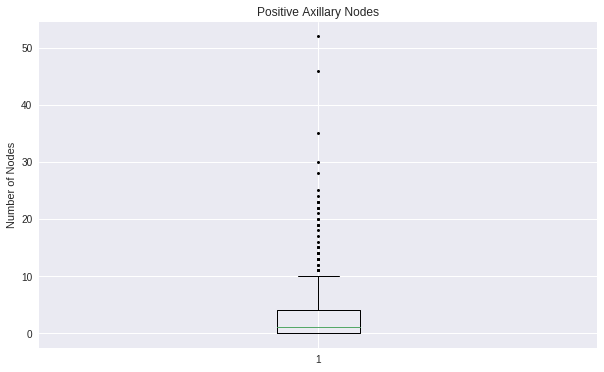

In [4]:
# There appears to be many outliers in positive_axillary_nodes
fig, ax = plt.subplots(figsize=(10, 6))
bp = plt.boxplot(patients_survival_data['positive_axillary_nodes'], sym='k.', showfliers=True)

ax.set_axisbelow(True)
ax.set_title('Positive Axillary Nodes')
ax.set_ylabel('Number of Nodes')

plt.show()

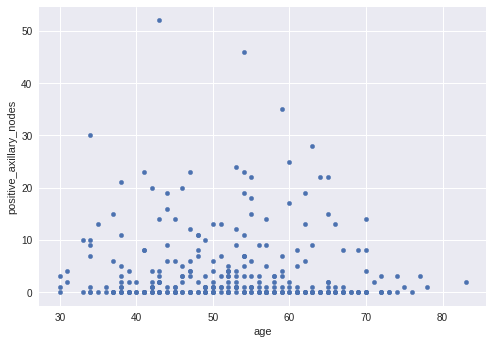

In [5]:
# Scatter plot between age and positive_axillary_nodes
patients_survival_data.plot.scatter(x = 'age', y = 'positive_axillary_nodes');

survival_status         0         1
age                                
(20, 40]         0.049383  0.173333
(40, 60]         0.679012  0.582222
(60, 80]         0.259259  0.244444
(80, 100]        0.012346  0.000000


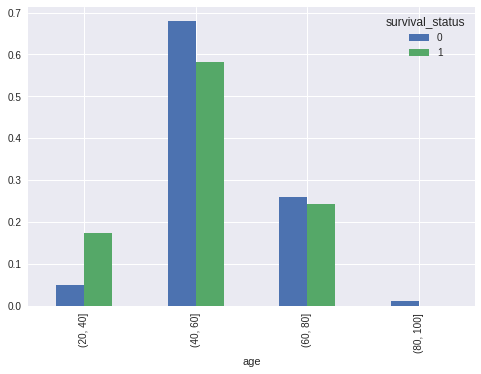

In [6]:
# Binning all the groups based on min and max values.
age_bins = pd.cut(patients_survival_data['age'], 
                  bins = [20, 40, 60, 80, 100])
year_of_oper_bins = pd.cut(patients_survival_data['year_of_operation'], 
                           bins = [55, 60, 65, 70])
num_of_pa_node_bins = pd.cut(patients_survival_data['positive_axillary_nodes'],
                             bins = [0, 10, 20, 30, 40, 50, 60])

# Bar plot between survival_status and age
ct_survival = pd.crosstab(age_bins,
                          patients_survival_data['survival_status'],
                          normalize='columns')

print(ct_survival)
ct_survival.plot(kind = 'bar', stacked = False);

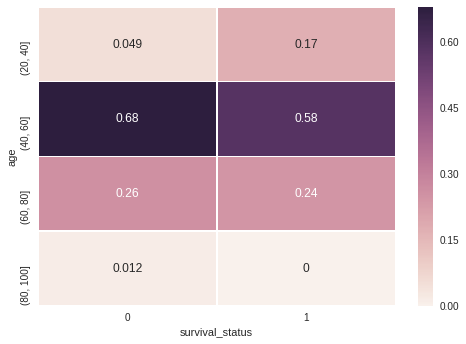

In [7]:
sns.heatmap(ct_survival, annot=True,  linewidths=.5)

survival_status           0         1
year_of_operation                    
(55, 60]           0.308642  0.293333
(60, 65]           0.481481  0.440000
(65, 70]           0.209877  0.266667


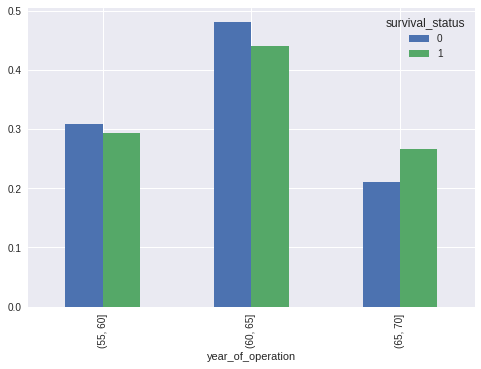

In [8]:
# Bar plot between survival_status and year_of_oper_bins
ct_survival = pd.crosstab(year_of_oper_bins,
                          patients_survival_data['survival_status'],
                          normalize='columns')

print(ct_survival)
ct_survival.plot(kind = 'bar', stacked = False);

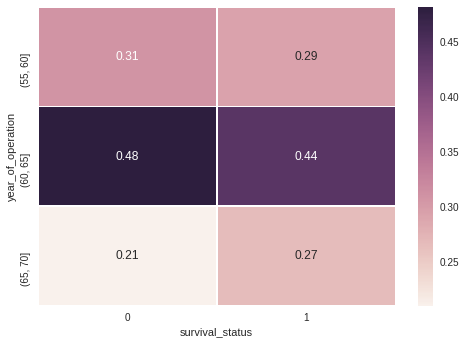

In [9]:
sns.heatmap(ct_survival, annot=True,  linewidths=.5)

survival_status                 0         1
positive_axillary_nodes                    
(0, 10]                  0.629032  0.842593
(10, 20]                 0.241935  0.101852
(20, 30]                 0.096774  0.046296
(30, 40]                 0.016129  0.000000
(40, 50]                 0.000000  0.009259
(50, 60]                 0.016129  0.000000


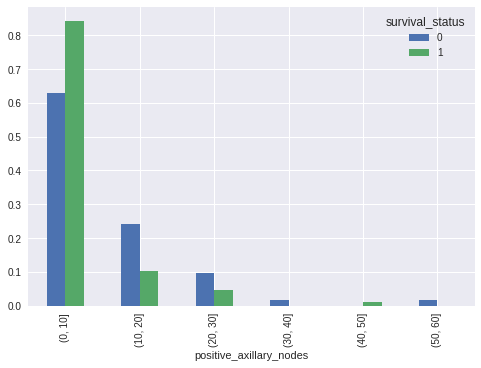

In [10]:
# Bar plot between survival_status and positive_axillary_nodes
ct_survival = pd.crosstab(num_of_pa_node_bins,
                          patients_survival_data['survival_status'],
                          normalize='columns')

print(ct_survival)
ct_survival.plot(kind = 'bar', stacked = False);

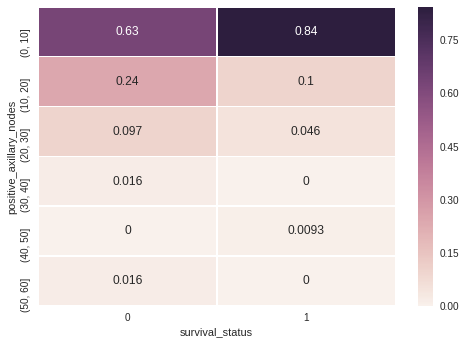

In [11]:
sns.heatmap(ct_survival, annot=True,  linewidths=.5)

positive_axillary_nodes   (0, 10]  (10, 20]  (20, 30]  (30, 40]  (40, 50]  \
age                                                                         
(20, 40]                 0.146154  0.115385  0.181818       0.0       0.0   
(40, 60]                 0.684615  0.692308  0.545455       1.0       1.0   
(60, 80]                 0.161538  0.192308  0.272727       0.0       0.0   
(80, 100]                0.007692  0.000000  0.000000       0.0       0.0   

positive_axillary_nodes  (50, 60]  
age                                
(20, 40]                      0.0  
(40, 60]                      1.0  
(60, 80]                      0.0  
(80, 100]                     0.0  


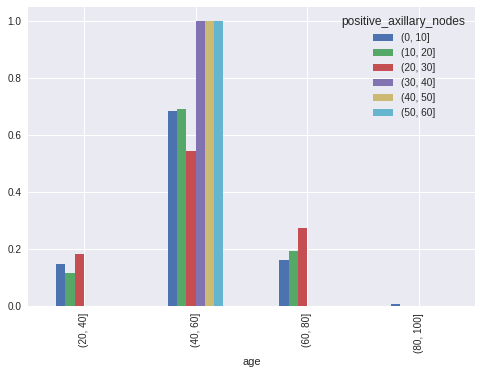

In [12]:
# Bar plot between positive_axillary_nodes and age
ct_survival = pd.crosstab(age_bins,
                          num_of_pa_node_bins,
                          normalize='columns')

print(ct_survival)
ct_survival.plot(kind = 'bar', stacked = False);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?

**Answer:** Number of Positive Axillary Nodes seems to have positive correlation with survival.
If there are fewer Positive Axillary Nodes, the chances of patient survival is more.

- What is at least one feature that looks to have a negative correlation with survival?

**Answer:** Age seems to have negative correlation with survival.
There is no direct correlation between age of the patient and survival. Older patients seems to have similar survival chances as compared to younger patients.

- How are those two features related with each other, and what might that mean?

**Answer:** Patients in the age group 40-60 seem to have higher Positive Axillary Nodes as compared to age groups 20-40 and 60-80.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.